In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min
#conda install fitter


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

## Introduction


In [400]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


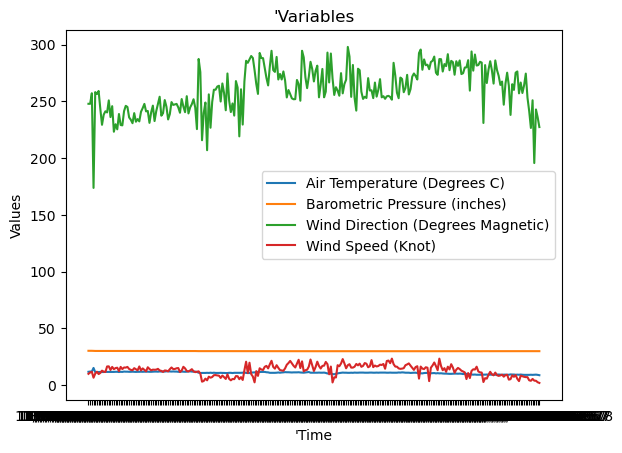

In [401]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [402]:
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
#plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
#plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [403]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [404]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [405]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [406]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [407]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [408]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


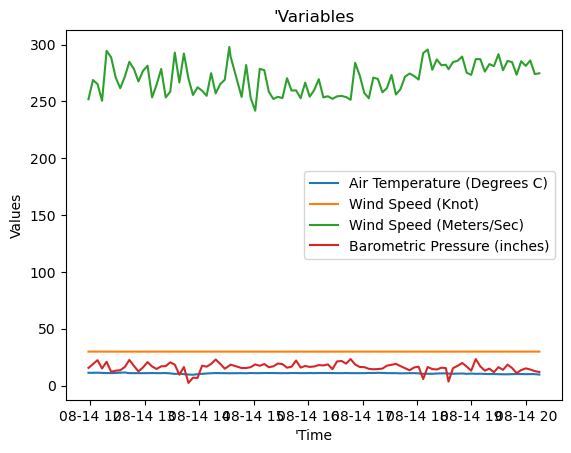

In [409]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [410]:
#df3

In [411]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


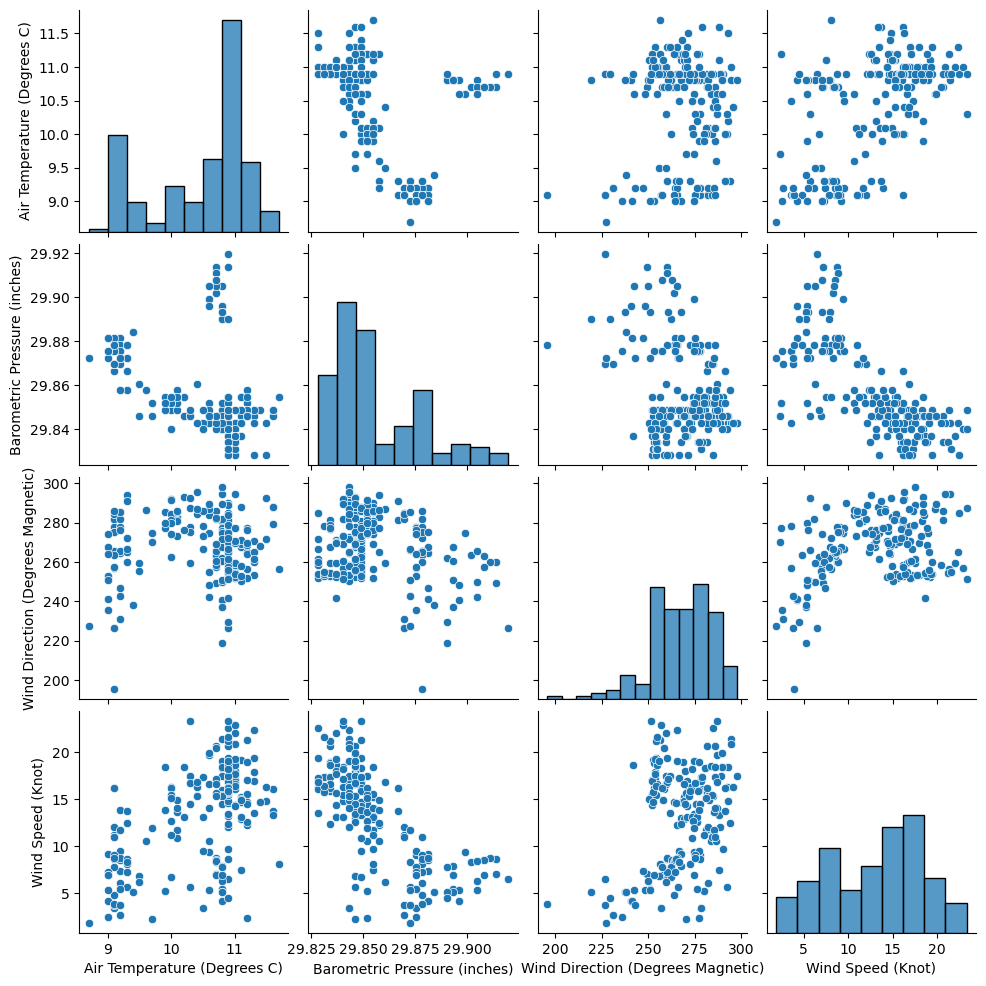

In [412]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

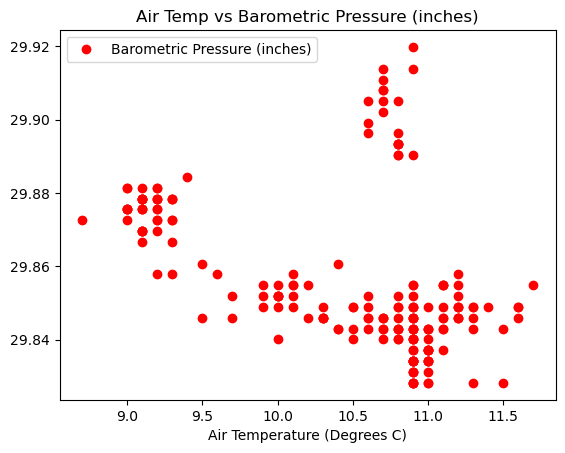

In [413]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

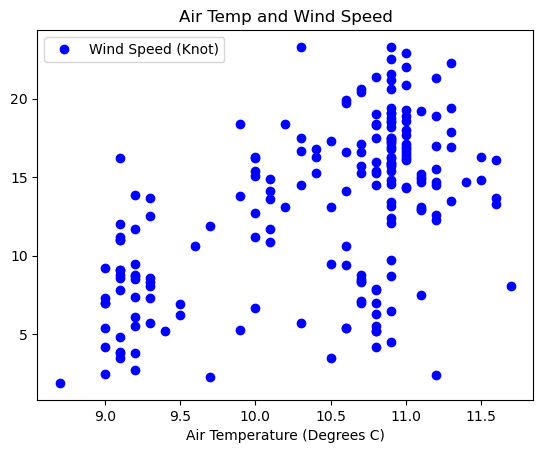

In [414]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [415]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

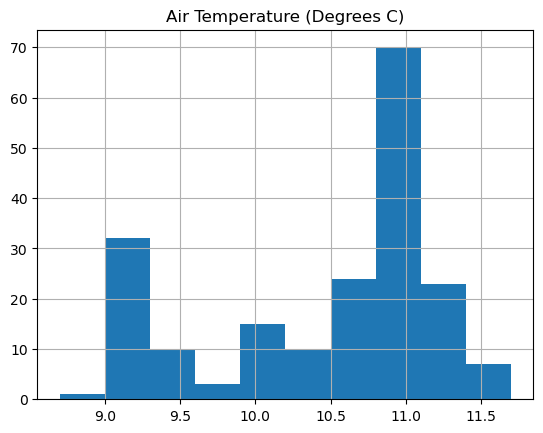

In [416]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [417]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               '2023-11-08 00:10:33', '2023-11-08 00:11:33',
               '2023-11-08 00:12:33', '2023-11-08 00:13:33',
               '2023-11-08 00:14:33', '2023-11-08 00:15:33',
               '2023-11-08 00:16:33', '2023-11-08 00:17:33',
               '2023-11-08 00:18:33', '2023-11-08 00:19:33',
               '2023-11-08 00:20:33', '2023-11-08 00:21:33',
               '2023-11-08 00:22:33', '2023-11-08 00:23:33',
               '2023-11-08 00:24:33', '2023-11-08 00:25:33',
               '2023-11-08 00:26:33', '2023-11-08 00:27:33',
               '2023-11-08 00:28:33', '2023-11-08 00:29:33',
               '2023-11-08 00:30:33', '2023-11-08 00:31:33',
               '2023-11-

In [418]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.4225, .7669
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,9.330538
2023-11-08 00:01:33,10.747529
2023-11-08 00:02:33,11.275127
2023-11-08 00:03:33,9.800327
2023-11-08 00:04:33,9.240234
...,...
2023-11-08 01:35:33,11.122318
2023-11-08 01:36:33,8.941105
2023-11-08 01:37:33,10.075846
2023-11-08 01:38:33,10.573291


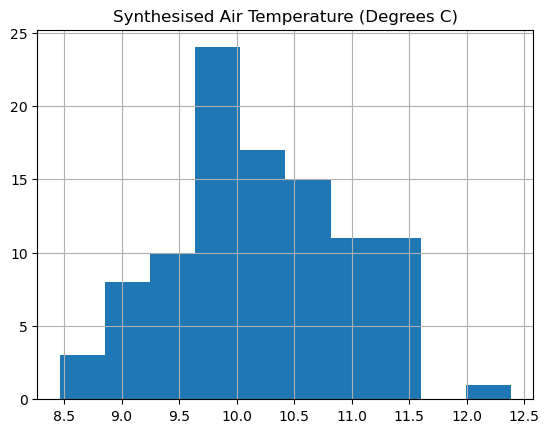

In [419]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Air Temperature (Degrees C)'>

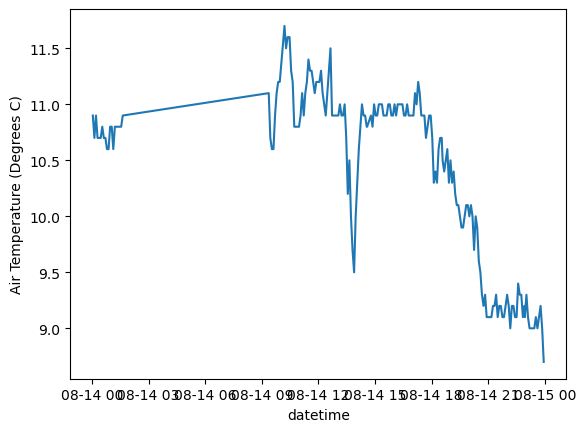

In [420]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [1196]:
s10 = np.random.normal(10.76,.76,200)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

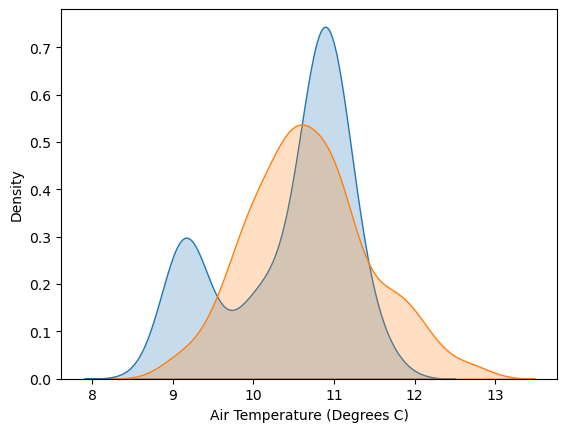

In [1197]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s10),shade=True)


some ditsributions i tried to to get a better distribuitn match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform

In [1542]:

s8 = np.random.standard_cauchy(200)
s8 = s8[(s8>8.6) & (s8<11)]  # truncate distribution so it plots well


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

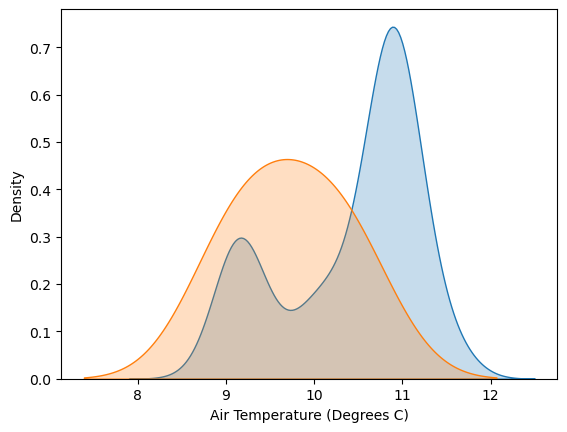

In [1543]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s8),shade=True)


In [1824]:

# Draw 10 samples from a standard Gamma distribution with shape 2
samples = np.random.standard_gamma(1, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

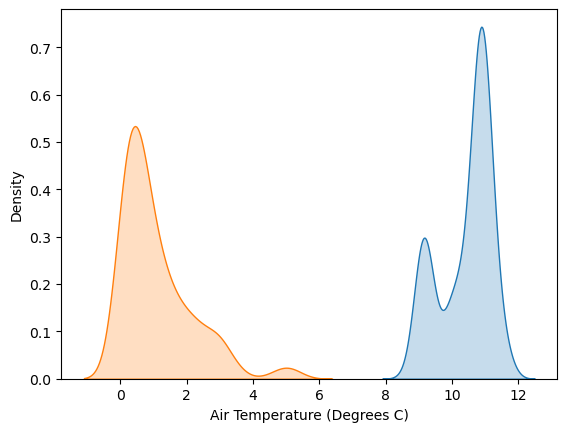

In [1825]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((samples),shade=True)

In [1826]:
import matplotlib.pyplot as plt
s2 = np.random.standard_t(10, size=200)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

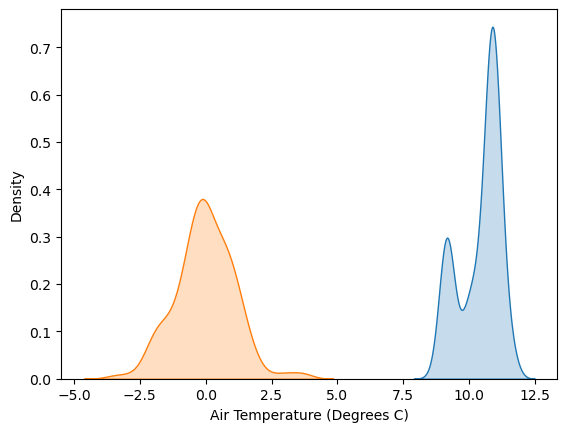

In [1827]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s2),shade=True)

In [1828]:
s4 = np.random.uniform(8.7,11.3,100)



<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

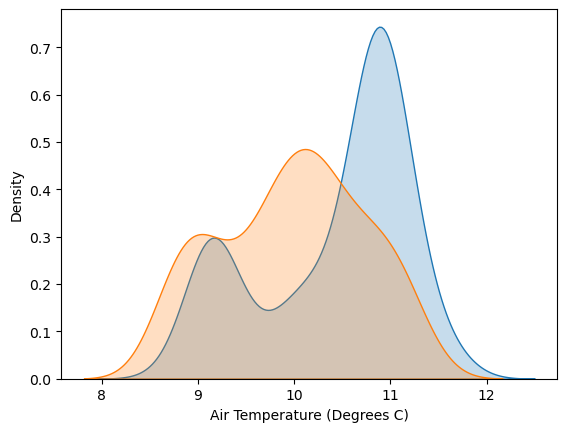

In [1893]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s4),shade=True)

In [1894]:
rng55 = np.random.default_rng()
mu1, sigma1 = 10.76, .76
ts55 = pd.DataFrame(data=rng55.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air'])
ts55

,Synthesised Air
2023-11-08 00:00:33,10.711843
2023-11-08 00:01:33,9.188109
2023-11-08 00:02:33,9.707654
2023-11-08 00:03:33,10.595416
2023-11-08 00:04:33,10.349859
...,...
2023-11-08 01:35:33,11.115119
2023-11-08 01:36:33,9.764289
2023-11-08 01:37:33,8.679273
2023-11-08 01:38:33,10.903297


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

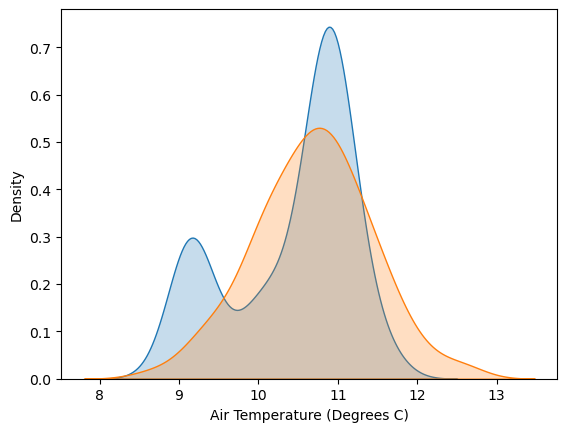

In [1895]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts55['Synthesised Air'],shade=True)

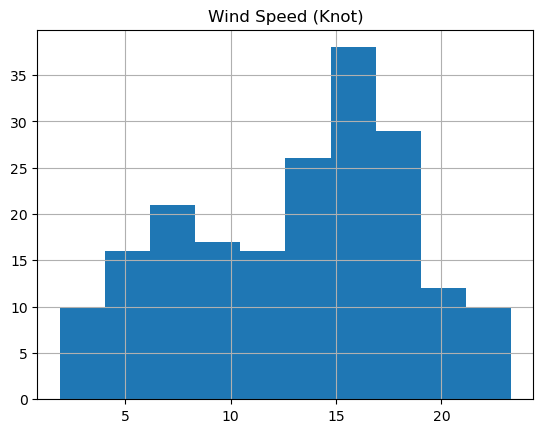

In [1896]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [1897]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

In [1898]:
a = 5

# Generate 1000 samples from the Weibull distribution
s9 = np.random.normal(10.4225,.7669, 200)
#s9

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

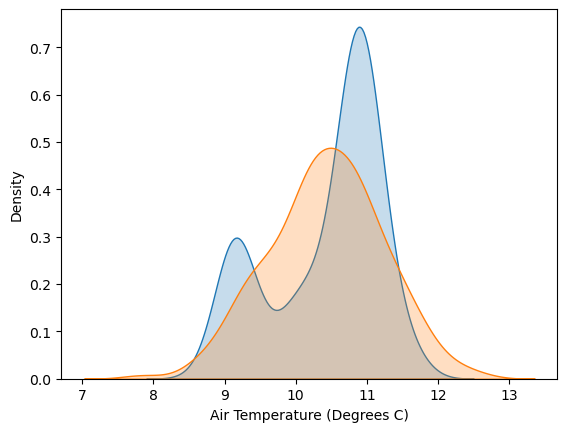

In [1899]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot((s9),shade=True)

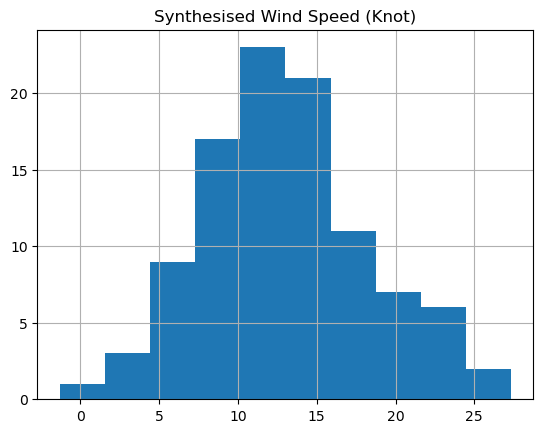

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

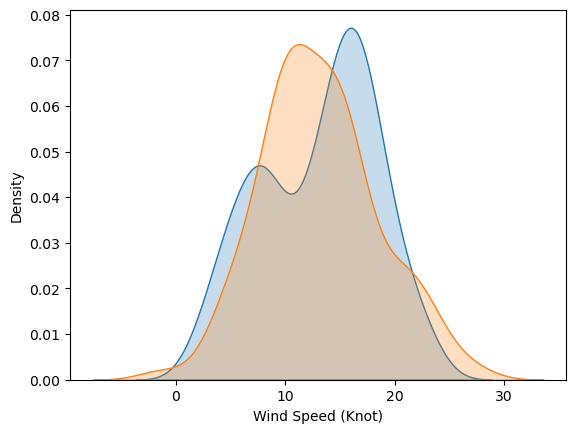

In [1901]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

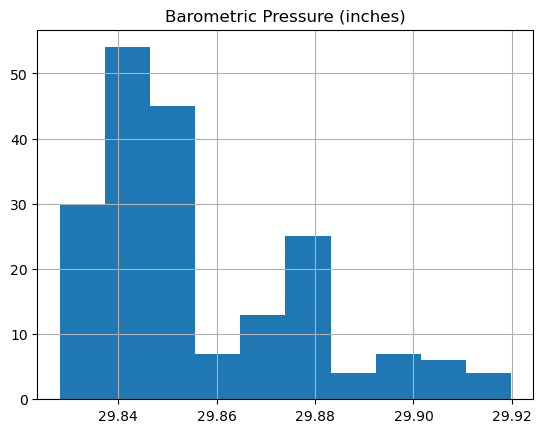

In [1902]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [1903]:
rng3 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.831091
2023-11-08 00:01:33,29.838880
2023-11-08 00:02:33,29.876367
2023-11-08 00:03:33,29.858638
2023-11-08 00:04:33,29.861018
...,...
2023-11-08 01:35:33,29.822573
2023-11-08 01:36:33,29.850230
2023-11-08 01:37:33,29.857300
2023-11-08 01:38:33,29.845259


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

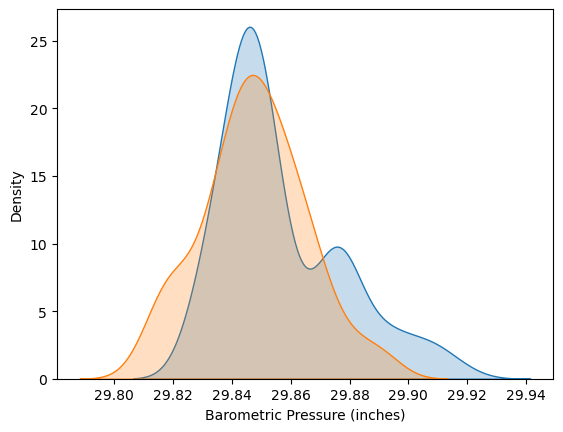

In [1904]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

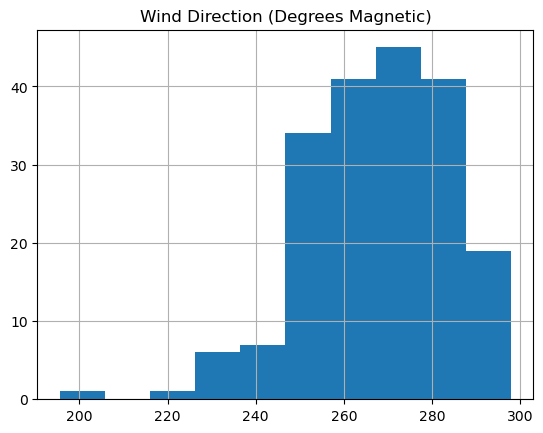

In [1905]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

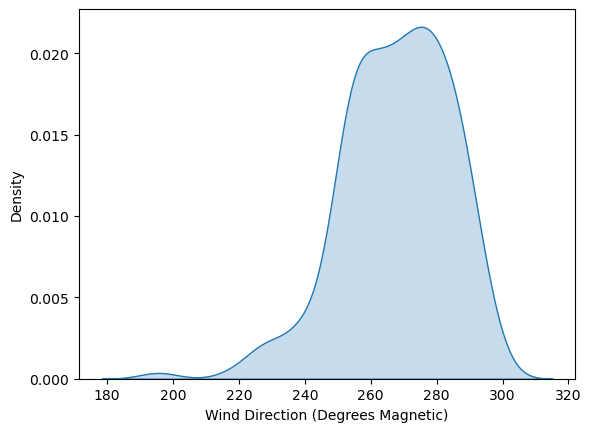

In [1906]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [1907]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,268.248702
2023-11-08 00:01:33,264.202753
2023-11-08 00:02:33,303.229306
2023-11-08 00:03:33,250.531168
2023-11-08 00:04:33,231.181583
...,...
2023-11-08 01:35:33,282.594752
2023-11-08 01:36:33,273.372909
2023-11-08 01:37:33,242.318113
2023-11-08 01:38:33,281.530431


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

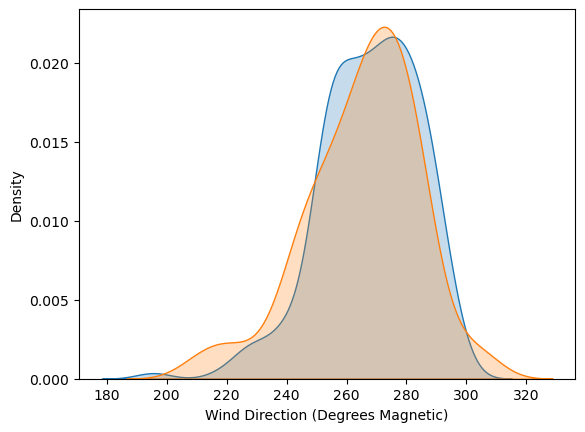

In [1908]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

In [1909]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [1910]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [1911]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

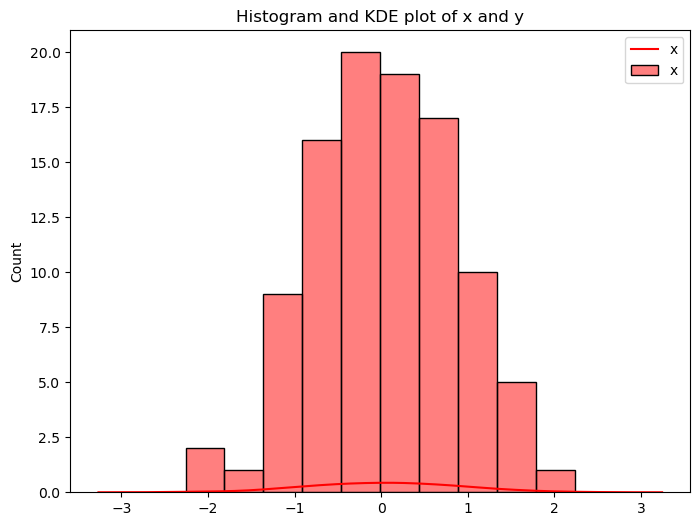

In [1912]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

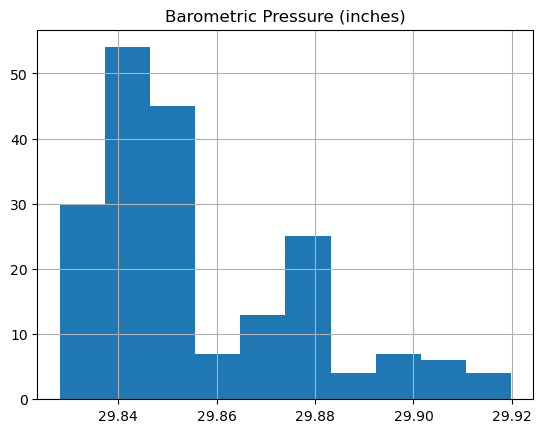

In [1916]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

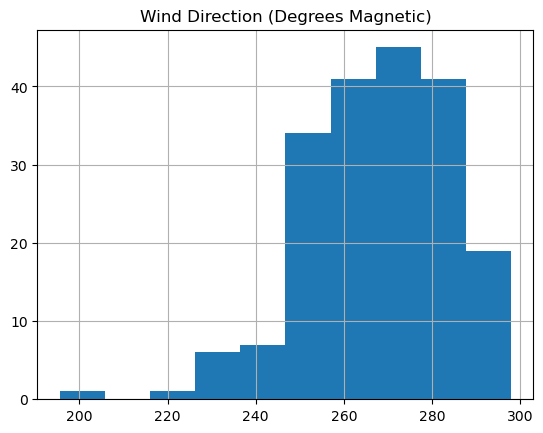

In [1917]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [1918]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,262.936088
2023-11-08 00:01:33,277.676086
2023-11-08 00:02:33,278.603703
2023-11-08 00:03:33,267.739387
2023-11-08 00:04:33,251.258806
...,...
2023-11-08 01:35:33,251.965857
2023-11-08 01:36:33,282.046194
2023-11-08 01:37:33,277.669128
2023-11-08 01:38:33,251.957899


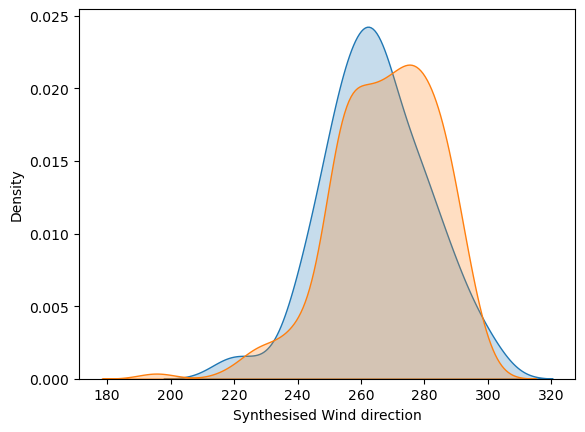

In [1919]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [1920]:
import numpy as np
dt = np.random.poisson(10.76, 100)
dt

array([15, 16, 13, 14,  5, 12,  7, 10, 11, 12, 11, 10, 11, 11, 16,  8,  9,
        9,  9, 12,  8, 13, 14, 12,  7,  9, 11, 11, 11,  7, 13, 11,  8, 12,
        9, 12,  5,  7, 10,  9, 12,  9,  6, 11, 12, 18, 12, 17,  8, 10,  9,
        8, 10,  9, 12, 10, 16,  7, 10, 14, 10, 10,  7, 13,  8, 14,  8, 12,
       12, 11, 13,  9,  9,  8, 11,  9,  8, 11, 10, 15,  8, 14, 15,  5, 11,
       13,  9, 12, 10, 16, 10, 11,  6,  8, 11, 13, 12,  6, 12,  8])

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

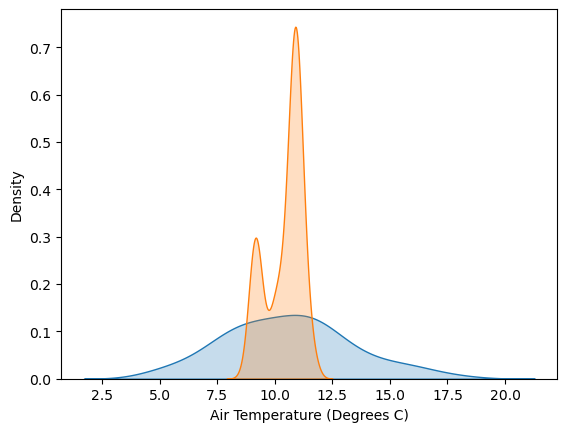

In [1921]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [1922]:

values = np.random.rayleigh(10.76, 200)
values

array([10.80557882, 21.06776963, 16.34569414, 16.50486694,  6.35731527,
       13.42166412, 11.08938267,  2.86871901,  8.94514335, 18.23001441,
       11.19816702,  1.56055546,  7.91990457,  3.8801384 , 24.75054657,
        7.11974297, 17.34412747, 18.13758843, 11.53364324, 12.10475355,
        9.11207353,  9.1032981 ,  5.37090168, 14.53160083, 30.51705753,
       13.84715624, 11.64304045,  9.37906483, 19.99036783,  7.68064734,
       19.34930169, 13.44453838,  2.43021255,  7.09703116,  3.75609465,
       20.82952721, 11.15080819, 18.30854036, 19.83139963, 11.52126054,
       35.78240297, 12.22537189, 12.43191902, 13.39364787,  8.78954063,
       10.52986878, 15.04977354, 19.58497473,  2.73513069, 17.78446737,
       13.64734551, 15.75225561, 13.89156442, 12.905125  ,  8.28440939,
        2.92713779,  7.2640388 ,  5.18776627,  6.09993048, 15.84312781,
        7.35673614,  2.83285044,  4.28447848,  4.41091638,  6.2036365 ,
       36.14368337,  9.54090658, 11.62852414, 18.85339297,  4.29

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

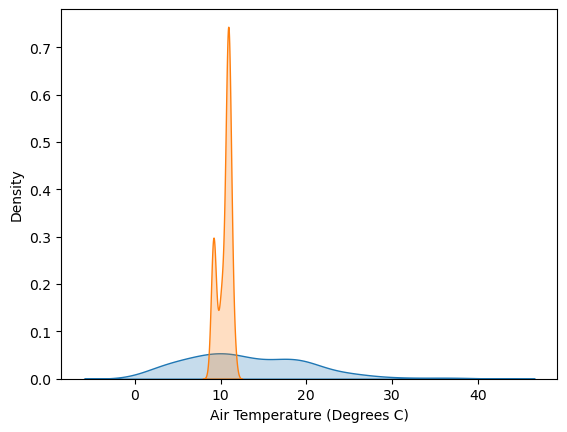

In [1923]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [1924]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

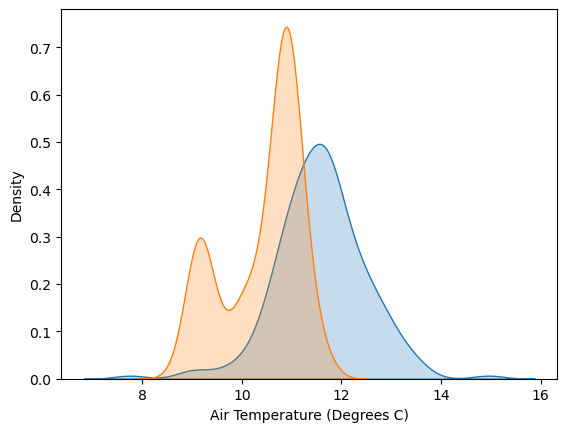

In [1925]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [1926]:
result=pd.concat([ts1,ts2,ts3,ts4])
result

,Synthesised Air Temperature (Degrees C),Synthesised Wind Speed (Knot),Synthesised Barometric,Synthesised Wind direction
2023-11-08 00:00:33,9.330538,NaN,NaN,NaN
2023-11-08 00:01:33,10.747529,NaN,NaN,NaN
2023-11-08 00:02:33,11.275127,NaN,NaN,NaN
2023-11-08 00:03:33,9.800327,NaN,NaN,NaN
2023-11-08 00:04:33,9.240234,NaN,NaN,NaN
...,...,...,...,...
2023-11-08 01:35:33,NaN,NaN,NaN,251.965857
2023-11-08 01:36:33,NaN,NaN,NaN,282.046194
2023-11-08 01:37:33,NaN,NaN,NaN,277.669128
2023-11-08 01:38:33,NaN,NaN,NaN,251.957899


In [1927]:
from scipy.stats import johnsonsu

# Load your dataset into a NumPy array
data = pd.read_csv('data.csv')

# Fit the Johnson SU distribution to your data
a, b, loc, scale = johnsonsu.fit(data)

# The 'a' and 'b' parameters are now available for use
print('a:', a)
print('b:', b)

a: 1.2011500626388192
b: 1.0081551947944454


In [1928]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[-1.71718204e+00 -6.11288012e-01 -1.46742613e+00 -2.83944187e+00
 -2.74302984e+00 -1.34917085e+00 -5.25184004e-01 -1.06963951e+00
  3.22632666e-01 -5.94586250e-01 -1.92319004e+00 -3.38094836e+00
 -4.66587031e+00 -4.70981666e-01  4.01129219e+00 -2.46727665e-01
 -3.39468369e+00 -1.53698812e+00 -1.29555539e+00 -1.05471707e+00
 -2.84475581e+00 -1.24046695e-01 -4.88527726e+00 -2.72524251e+00
 -3.96673584e+00 -4.60575891e-01 -3.80598220e+00 -4.72563452e-01
 -1.74515664e+00 -4.80783904e-01  1.92942173e-01 -3.20458889e+00
 -2.58174872e+00  9.91523111e-01 -1.68825685e+00 -4.49016408e-01
 -3.64536374e+00 -2.03450676e+00 -3.52509389e+00 -9.24840444e-01
 -2.71580379e+00 -2.99492312e+00 -1.84771079e+01 -5.52753529e-01
 -2.75296893e+00 -6.23838057e-01 -1.07187755e+00  3.57536481e-01
 -3.88376392e+00 -8.02977671e-01 -1.11131305e+00 -1.75307995e+00
 -8.63448012e-01 -9.40593682e-01  3.18656430e-01 -8.30737847e-01
 -5.46134714e+00 -4.33419414e-01 -2.50204538e+00 -3.10522411e+00
  5.17338541e-01 -1.54512

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

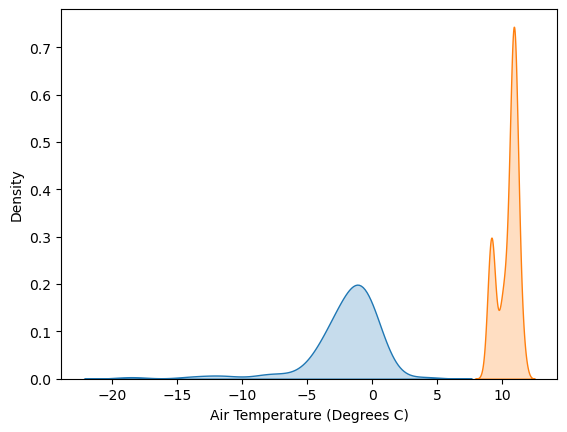

In [1929]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

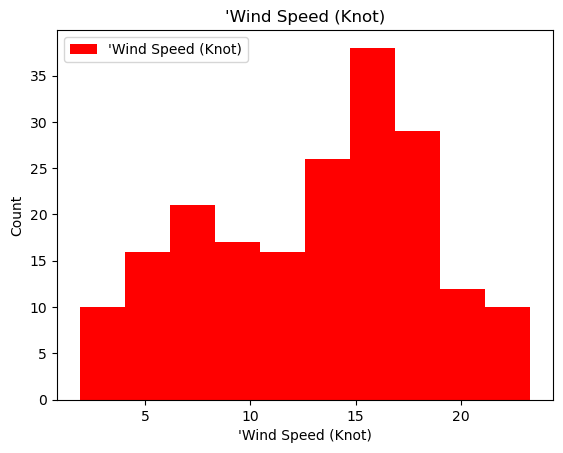

In [1930]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

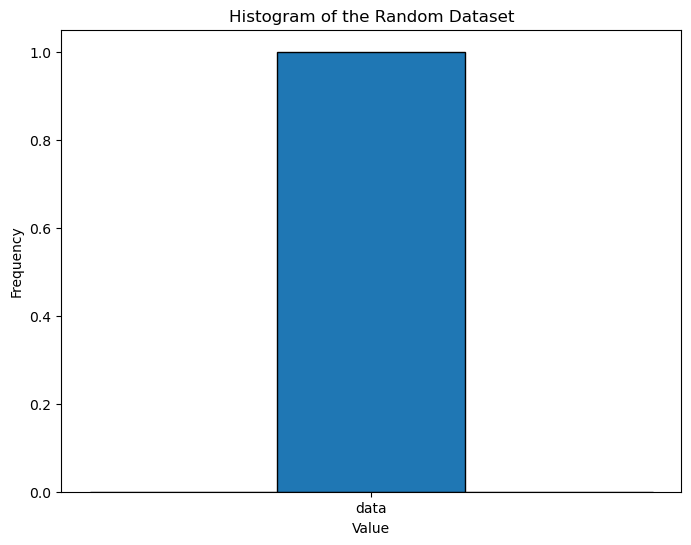

In [1931]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [1932]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [1933]:
#rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

2.1326705824865475 0 24.601394983518027


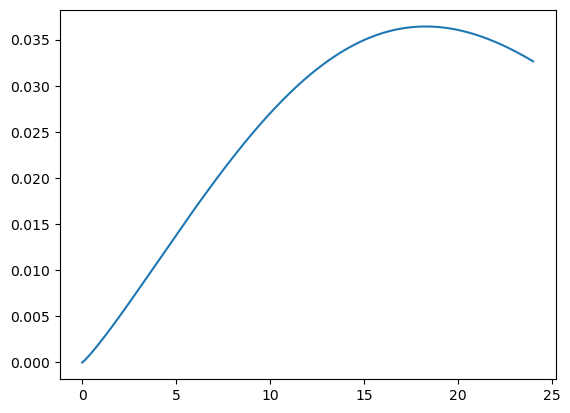

In [1934]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

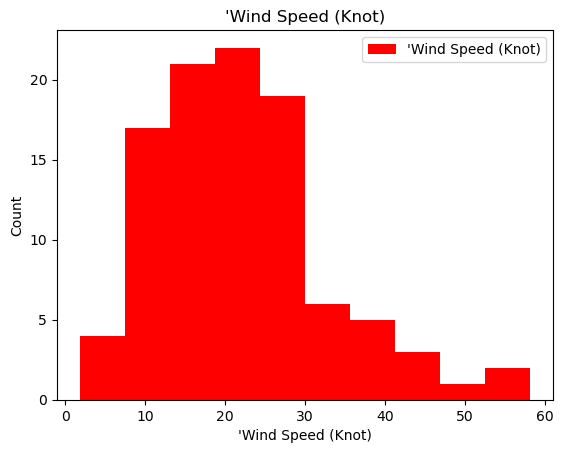

In [1935]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

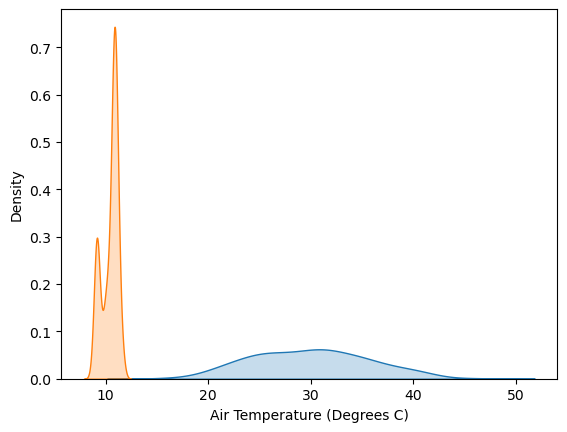

In [1936]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

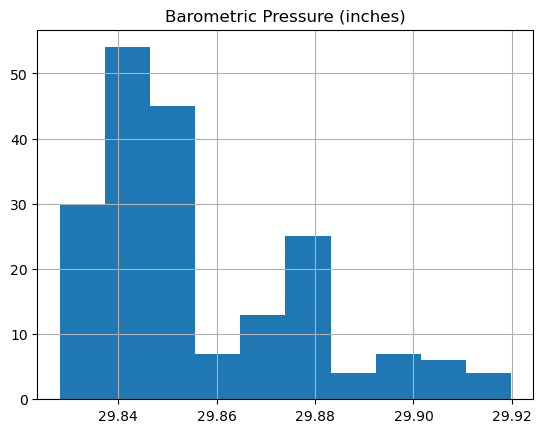

In [1937]:
df3.hist('Barometric Pressure (inches)')
plt.show()
#plt.hist(df3('Barometric Pressure (inches)'))
#plt.show()

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

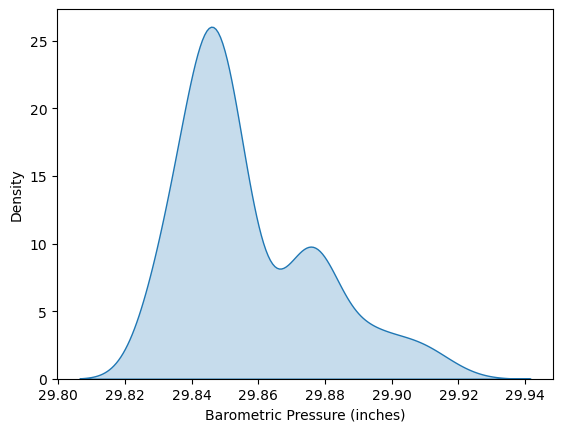

In [1938]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

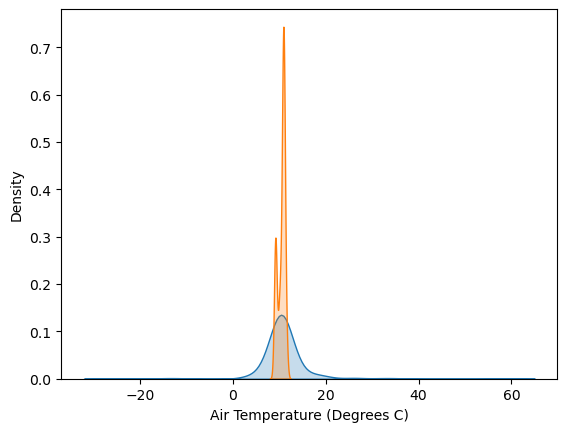

In [1939]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

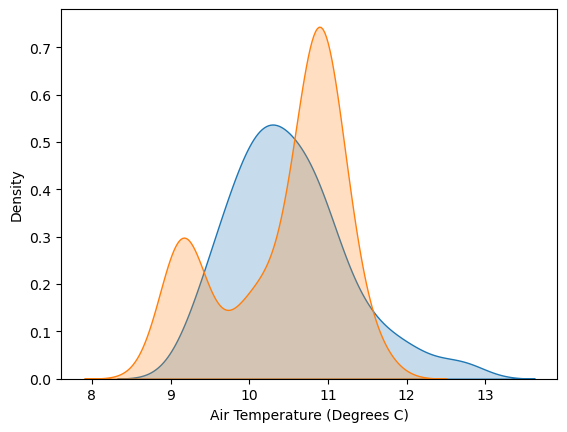

In [1940]:
# Set the shape and scale parameters
shape = 1
scale = 1

# Calculate the mean and standard deviation
mean = 10.42
std_dev = 0.766

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

In [1941]:


# Normal distribution variables
mu1, sigma1 = 29.8566, .0208
#mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)
#normal2 = np.random.normal(mu2, sigma2, 180)

# Weibull distribution variables
#a1, b1 = 2.1, 8.5
#a2, b2 = 5, 2
#weibull1 = np.random.weibull(a1, 180) * b1
#weibull2 = np.random.weibull(a2, 180) * b2

# Create dataframe
df23 = pd.DataFrame({
    'normal1': normal1,
  #  'normal2': normal2,
    #'weibull1': weibull1,
    #'weibull2': weibull2
})

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

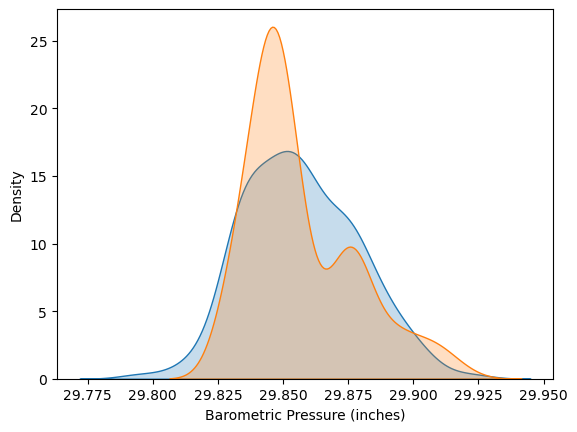

In [1942]:
sns.kdeplot(normal1,shade=True)
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)

In [1943]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,295.904317
2023-11-08 00:01:33,277.709859
2023-11-08 00:02:33,263.077809
2023-11-08 00:03:33,240.355943
2023-11-08 00:04:33,277.048948
...,...
2023-11-08 01:35:33,265.295659
2023-11-08 01:36:33,259.766246
2023-11-08 01:37:33,299.500115
2023-11-08 01:38:33,255.566270


In [1944]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

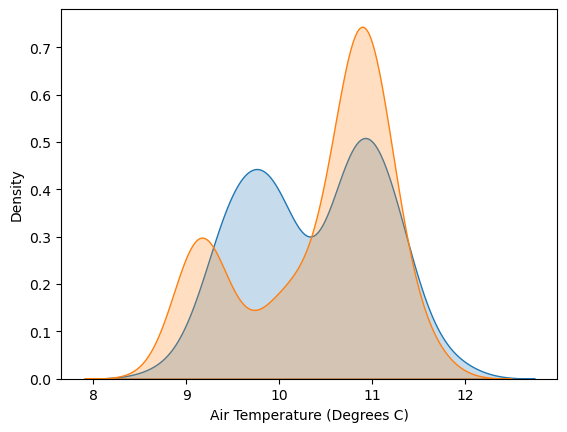

In [1945]:
import numpy as np
from scipy.stats import dweibull
mean = 10.4225
std_dev = 0.7669

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


In [1946]:
import numpy as np
from scipy.stats import weibull_min



In [1947]:
mean = 30
std_dev = 0.02
min_val = 29.82
max_val = 29.91

# Calculate the shape and scale parameters
c = (max_val - mean) / (mean - min_val)
k = np.log(2) / np.log((c + 1) / c)
#scale = 1 # Set the scale parameter to a positive value

# Generate 1000 random numbers from the Weibull distribution
#data = weibull_min.rvs(k, loc=mean, scale=scale, size=1000)

C:\Users\irivyo\AppData\Local\Temp\ipykernel_14708\4112933684.py:8: RuntimeWarning: invalid value encountered in log
  k = np.log(2) / np.log((c + 1) / c)


Rayleigh PDF 

In [1948]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

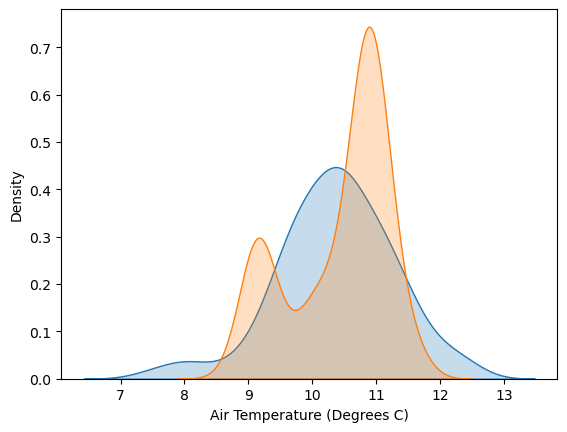

In [1949]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

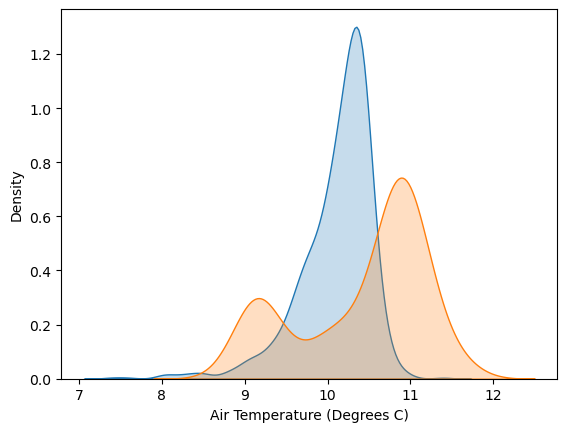

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

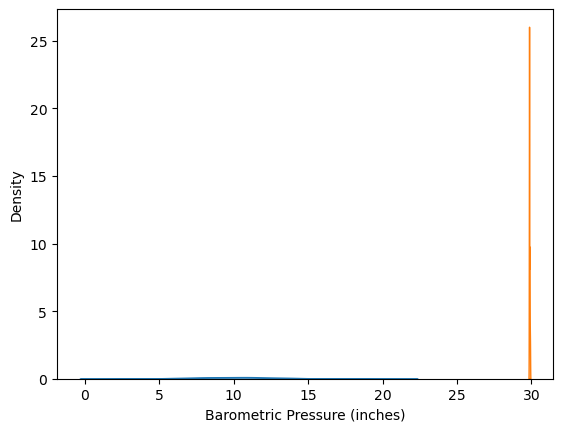

In [1955]:
mean = 10.82
std_dev = 0.76
#min_val = 29.82
#max_val = 29.91

# Generate a normal distribution with the given mean and standard deviation
normal_dist = np.random.normal(mean, std_dev, 1000)

# Calculate the probability of getting a value between min_val and max_val


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

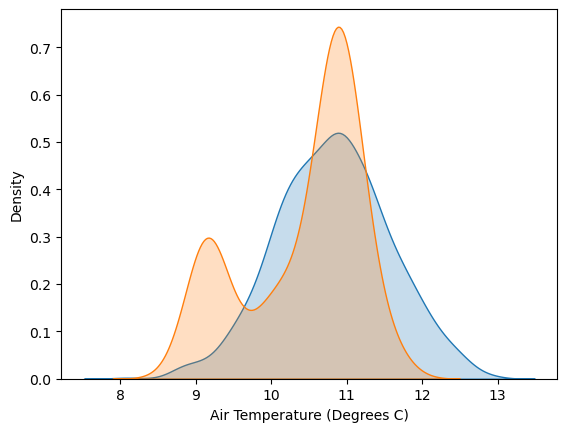

In [1956]:
sns.kdeplot(normal_dist,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)